In [2]:
import tensorflow as tf
import matplotlib
import keras
import numpy as np

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [4]:
(X_treinamento, Y_treinamento), (X_teste, Y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


divisão do dataset em treino e teste

In [5]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

Temos 60 mil imagens diferentes e cada imagem e uma matriz de 28 linhas e 28 colunas

E cada um desses valores da matriz e o dados especifico de um pixel dessa imagem

In [6]:
X_treinamento

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
Y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

AttributeError: 'str' object has no attribute 'items'

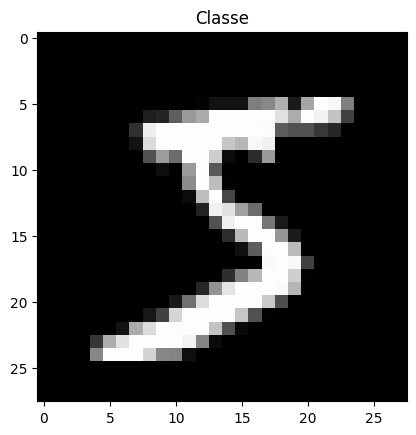

In [8]:
plt.imshow(X_treinamento[0], cmap='gray') #gray serve para mostrar a imagem em preto e cinza
plt.title('Classe', str(Y_treinamento[0]))

AttributeError: 'str' object has no attribute 'items'

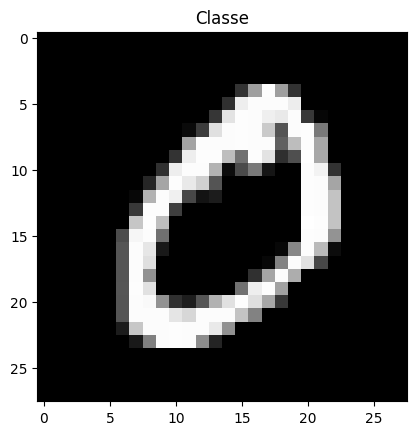

In [9]:
plt.imshow(X_treinamento[1], cmap='gray') #gray serve para mostrar a imagem em preto e cinza
plt.title('Classe', str(Y_treinamento[1]))

Pre-processamento

In [10]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1) #Adiciona o numero um pelo fato que nossas imagens nao sao coloridas
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [11]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
# Convertendo o tipo de dado do array de treinamento para float32.
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [13]:
# normalizando para valores entre 0 e 1
X_treinamento /= 255
X_teste /= 255

In [14]:
X_treinamento.max(), X_treinamento.min()

(np.float32(1.0), np.float32(0.0))

In [15]:
Y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
# aplicando one hot enconder nas saídas
# transformando o número inteiro em uma codificação binária de 10 elementos
Y_treinamento = np_utils.to_categorical(Y_treinamento, 10)
Y_teste = np_utils.to_categorical(Y_teste, 10)

In [17]:
Y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
Y_treinamento[0] #Numero Cinco

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Estrutura da Rede Neural

In [27]:
Rede_neural = Sequential()  # Modelo sequencial (camadas empilhadas)

Rede_neural.add(InputLayer(shape = (28, 28, 1)))  # Entrada: imagem 28x28 em tons de cinza
Rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))  # Convolução: 32 filtros 3x3 + ReLU
Rede_neural.add(MaxPooling2D(pool_size=(2, 2)))  # Redução espacial (downsampling) 2x2
Rede_neural.add(Flatten())  # Achata os dados 2D para 1D
Rede_neural.add(Dense(units=128, activation='relu'))  # Camada totalmente conectada com 128 neurônios
Rede_neural.add(Dense(units=10, activation='softmax'))  # Saída: 10 classes com softmax

In [28]:
Rede_neural.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
Rede_neural.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Treinando o modelo

In [22]:
Rede_neural.fit(X_treinamento, Y_treinamento, batch_size=128, epochs=5, validation_data=(X_teste, Y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.8847 - loss: 0.4245 - val_accuracy: 0.9723 - val_loss: 0.0853
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9800 - loss: 0.0686 - val_accuracy: 0.9802 - val_loss: 0.0573
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9868 - loss: 0.0457 - val_accuracy: 0.9829 - val_loss: 0.0506
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9901 - loss: 0.0328 - val_accuracy: 0.9853 - val_loss: 0.0418
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9859 - val_loss: 0.0477


In [23]:
resultado = Rede_neural.evaluate(X_teste, Y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0597


In [24]:
resultado

[0.047701697796583176, 0.9858999848365784]

# Otimizando a rede neural

In [29]:
Rede_neural = Sequential()  # Modelo sequencial
Rede_neural.add(InputLayer(shape = (28, 28, 1)))  # Entrada: imagem 28x28x1

Rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))  # Convolução 3x3
Rede_neural.add(BatchNormalization())  # Normaliza ativação para treinar melhor
Rede_neural.add(MaxPooling2D(pool_size=(2, 2)))  # Reduz tamanho espacial

Rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))  # Nova convolução
Rede_neural.add(BatchNormalization())  # Normaliza novamente
Rede_neural.add(MaxPooling2D(pool_size=(2, 2)))  # Nova redução espacial

Rede_neural.add(Flatten())  # Achata a saída para vetor 1D

Rede_neural.add(Dense(units=128, activation='relu'))  # Camada densa 128 neurônios
Rede_neural.add(Dropout(0.2))  # Dropout para evitar overfitting

Rede_neural.add(Dense(units=128, activation='relu'))  # Outra densa 128 neurônios
Rede_neural.add(Dropout(0.2))  # Outro dropout

Rede_neural.add(Dense(units=10, activation='softmax'))  # Saída: 10 classes

In [30]:
Rede_neural.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [31]:
Rede_neural.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
Rede_neural.fit(X_treinamento, Y_treinamento, batch_size=128, epochs=5, validation_data=(X_teste, Y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.8528 - loss: 0.4638 - val_accuracy: 0.9669 - val_loss: 0.1179
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.9799 - loss: 0.0677 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.9851 - loss: 0.0502 - val_accuracy: 0.9886 - val_loss: 0.0341
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9885 - val_loss: 0.0374
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9894 - val_loss: 0.0366


In [33]:
resultado = Rede_neural.evaluate(X_teste, Y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9869 - loss: 0.0438


In [34]:
resultado

[0.03658820316195488, 0.9894000291824341]

# validaçao cruzada

In [35]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #5 Grupos com a mesma quantidade, True para deixar os dados embaralhados

In [36]:
(X, y), (X_teste, y_teste) = mnist.load_data()

In [37]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [38]:
X = X.astype('float32')
X_teste = X_teste.astype('float32')

In [39]:
X /= 255          # Normaliza os pixels de treino 0 e 1
X_teste /= 255    # Normaliza os pixels de teste

In [40]:
y = np_utils.to_categorical(y, 10)         # Converte rótulos de treino para one-hot (10 classes)
y_teste = np_utils.to_categorical(y_teste, 10)  # Converte rótulos de teste]

In [ ]:
resultados = []
for indice_treinamento, indice_teste in kfold.split(X, np.zeros(shape=(y.shape[0], 1))):
    print(f'Indice treinamento: {indice_treinamento} \t Indice teste: {indice_teste}')
    rede_neural = Sequential()
    rede_neural.add(InputLayer(shape=(28, 28, 1)))
    rede_neural.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))
    rede_neural.add(MaxPooling2D(pool_size=(2, 2)))
    rede_neural.add(Flatten())
    rede_neural.add(Dense(units=128, activation='relu'))
    rede_neural.add(Dropout(0.2))
    rede_neural.add(Dense(units=10, activation='softmax'))

    rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    rede_neural.fit(X[indice_treinamento], y[indice_treinamento],
                batch_size=128,
                epochs=5
    )
    precisao = rede_neural.evaluate(X[indice_teste], y[indice_teste])
    resultados.append(precisao[1])


Indice treinamento: [    0     1     2 ... 59996 59998 59999] 	 Indice teste: [    3     4     8 ... 59991 59993 59997]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.8487 - loss: 0.5123
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9743 - loss: 0.0889
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9824 - loss: 0.0593
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9859 - loss: 0.0439
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9891 - loss: 0.0343
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0572
Indice treinamento: [    1     2     3 ... 59996 59997 59999] 	 Indice teste: [    0     6     7 ... 59988 59990 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.8478 - loss: 0.5279
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9700 - loss: 0.1004
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9810 - lo

In [42]:
resultado

[0.03658820316195488, 0.9894000291824341]

# Argumentation

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #usada para pré-processamento e aumento de dados de imagem

In [44]:
Rede_neural = Sequential()
Rede_neural.add(InputLayer(shape = (28, 28, 1)))
Rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
Rede_neural.add(MaxPooling2D(pool_size=(2, 2)))
Rede_neural.add(Flatten())
Rede_neural.add(Dense(units=128, activation='relu'))
Rede_neural.add(Dense(units=10, activation='softmax'))

In [45]:
Rede_neural.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
gerador_treinamento = ImageDataGenerator(
    rotation_range=7,         # Rotação aleatória de até 7 graus
    horizontal_flip=True,     # Espelhamento horizontal aleatório
    shear_range=0.2,          # Distorção no eixo (cisalhamento)
    height_shift_range=0.07,  # Deslocamento vertical aleatório
    zoom_range=0.2            # Zoom aleatório nas imagens
)

In [48]:
gerador_teste = ImageDataGenerator()  # Gera dados de teste sem transformações; usado apenas para normalizar as imagens

In [49]:
base_treinamento = gerador_treinamento.flow(X_treinamento, Y_treinamento, batch_size=128)  # Aplica aumento de dados e gera lotes para treino
base_teste = gerador_teste.flow(X_teste, Y_teste, batch_size=128)  # Gera lotes de teste sem aumento de dados

Nao conseguimos ver essas novas imagens

In [50]:
Rede_neural.fit(base_treinamento, epochs=5, validation_data=(base_teste))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.7594 - loss: 0.7659 - val_accuracy: 0.9508 - val_loss: 0.1572
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.9291 - loss: 0.2311 - val_accuracy: 0.9636 - val_loss: 0.1123
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9448 - loss: 0.1796 - val_accuracy: 0.9696 - val_loss: 0.0939
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9569 - loss: 0.1412 - val_accuracy: 0.9698 - val_loss: 0.0955
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9606 - loss: 0.1233 - val_accuracy: 0.9779 - val_loss: 0.0710
